# Attribute Info:
* Age 
* Sex
* Chest Pain
* Resting Blood Pressure
* Serum Cholestrol
* Fasting Blood Pressure
* Resting electrocardiographic results
* Maximum heart rate achieved
* Exercise induced angina
* ST depression induced by exercise relative to rest
* The slope of the peak exercise ST segment
* Number of major vessels (0-3)
* 3 = normal; 6 = fixed defect; 7 = reversable defect
* Target - 1 or 0

In [1]:
#Importing the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")
import os
print(os.listdir("../input"))

['heart.csv']


In [2]:
#Importing the CSV data in form of dataframe.
df = pd.read_csv('../input/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Checking the info of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


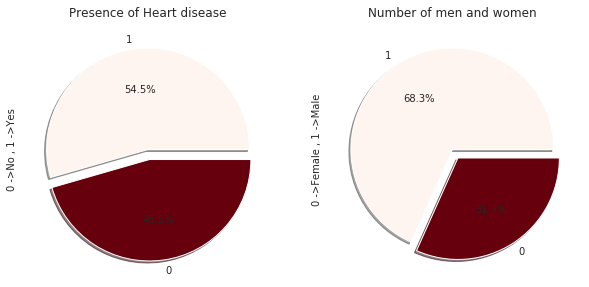

In [4]:
#Visualizing the data.
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('Presence of Heart disease')
df['target'].value_counts().plot.pie(explode=[0.0,0.1],autopct='%.1f%%',shadow=True, cmap='Reds',ax= ax[0])
ax[0].set_ylabel("0 ->No , 1 ->Yes")
plt.title('Number of men and women')
df['sex'].value_counts().plot.pie(explode=[0.0,0.1],autopct='%.1f%%',shadow=True, cmap='Reds',ax= ax[1])
ax[1].set_ylabel("0 ->Female , 1 ->Male");

So we see that there are 54.5% people in this dataset suffering from heart disease and 68.3% of the people in the dataset are men, so lets check how many men and women are specifically suffering from heart disease.

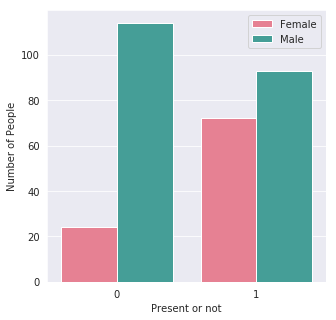

In [5]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'target',data = df,hue = 'sex',palette = 'husl')
plt.xlabel('Present or not')
plt.ylabel('Number of People')
plt.legend(['Female','Male']);

So we can see that clearly more number of men are suffering from heart diseases as compared to women.While the range of men suffering from heart disease lies between 80-100, the number of women suffering from heart disease lies between 60-80.

Now lets check the actual age distribution given in the dataset.

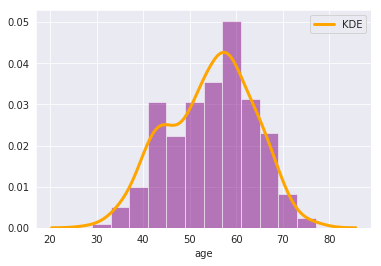

In [6]:
sns.distplot(df['age'],color='Purple',hist_kws={'alpha':0.5,'linewidth': 1}, kde_kws={'color': 'orange', 'lw': 3, 'label': 'KDE'});

Lets check the presence of disease for different age groups in the given data. 

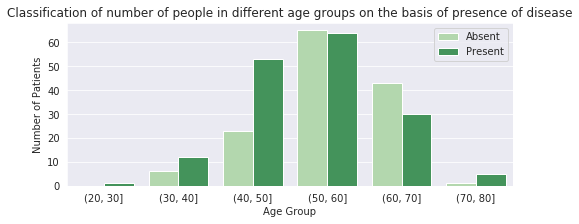

In [7]:
plt.figure(figsize = (8,3))
bins = [20,30,40,50,60,70,80]
df['age_bins']=pd.cut(df['age'], bins=bins)
g1=sns.countplot(x='age_bins',data=df ,hue='target',palette='Greens',linewidth=1)
plt.legend(['Absent','Present'])
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.title('Classification of number of people in different age groups on the basis of presence of disease');

So we can notice that there are more people suffering from heart disease in the 50-60 age group.

Now lets check the number of patients with different type chest pain on the basis of presence of heart disease.

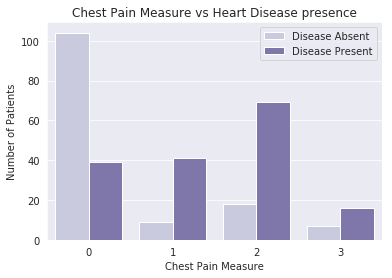

In [8]:
sns.countplot(x='cp',data=df,hue='target',palette='Purples',linewidth=1)
plt.title('Chest Pain Measure vs Heart Disease presence')
plt.ylabel('Number of Patients')
plt.xlabel('Chest Pain Measure')
plt.legend(['Disease Absent','Disease Present']);

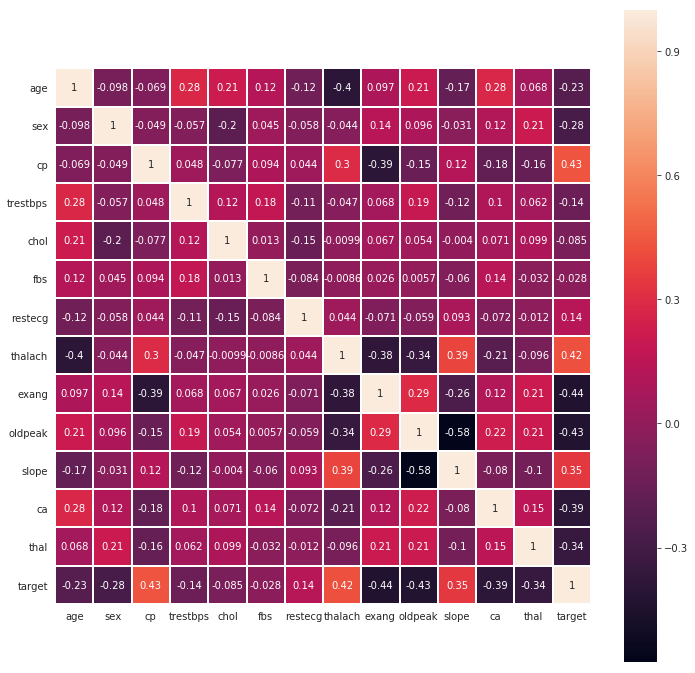

In [9]:
#Heatmap of the correlation.
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),square = True,annot=True,linewidths=1);

Now to check the Resting Blood Pressure for different Age groups on the basis of presence of disease.

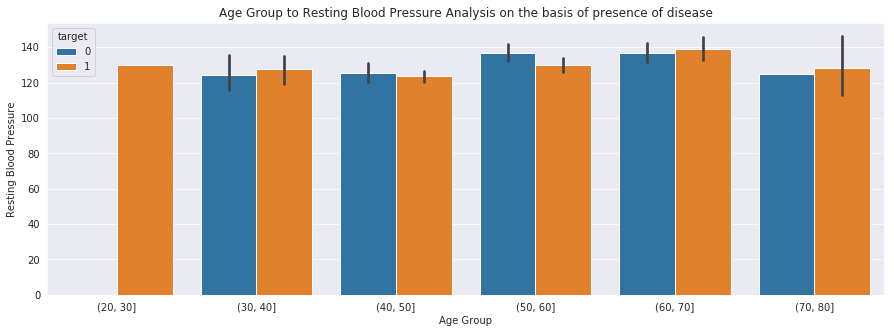

In [10]:
plt.figure(figsize = (15,5))
sns.barplot(x=df['age_bins'],y=df['trestbps'],hue = df['target'])
plt.xlabel('Age Group')
plt.ylabel('Resting Blood Pressure')
plt.title('Age Group to Resting Blood Pressure Analysis on the basis of presence of disease');

Clearly the maximum Resting Blood Pressure is higher at the age of 60-70.

Now lets check the Serum Cholestrol measure at different age groups on the basis of presence of disease.

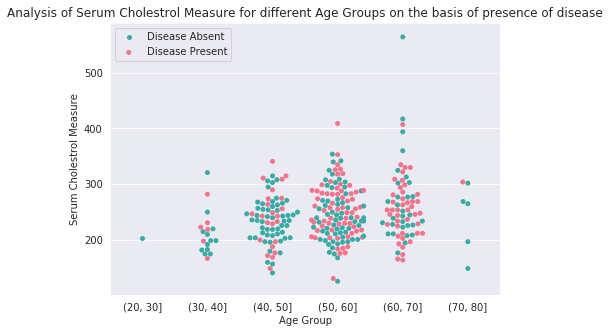

In [11]:
plt.figure(figsize = (7,5))
sns.swarmplot(x='age_bins',y= 'chol',data=df,hue='target',palette='husl')
plt.title('Analysis of Serum Cholestrol Measure for different Age Groups on the basis of presence of disease')
plt.xlabel('Age Group')
plt.ylabel('Serum Cholestrol Measure')
plt.legend(['Disease Absent','Disease Present']);

So we can see that Serum Cholestrol measure is highest in the age group of 50-60.

Next we will see the Fasting Blood Sugar vs Age group analysis.

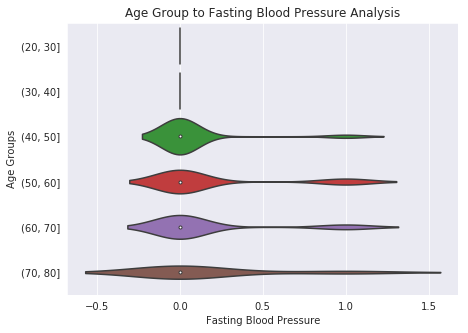

In [12]:
plt.figure(figsize = (7,5))
sns.violinplot(x=df['fbs'],y=df['age_bins'])
plt.xlabel('Fasting Blood Pressure')
plt.ylabel('Age Groups')
plt.title('Age Group to Fasting Blood Pressure Analysis');

Fasting Blood Pressure is maximum in the age group of 70-80.

Now to analyze the slope of the peak exercise ST segment on the basis of presence of disease.

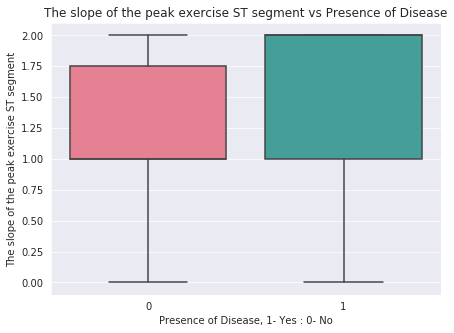

In [13]:
plt.figure(figsize = (7,5))
sns.boxplot(x='target',y= 'slope',data=df,palette='husl')
plt.title('The slope of the peak exercise ST segment vs Presence of Disease')
plt.xlabel('Presence of Disease, 1- Yes : 0- No')
plt.ylabel('The slope of the peak exercise ST segment');

Lets compare Serum Cholestrol measure to Resting Blood Pressure now.

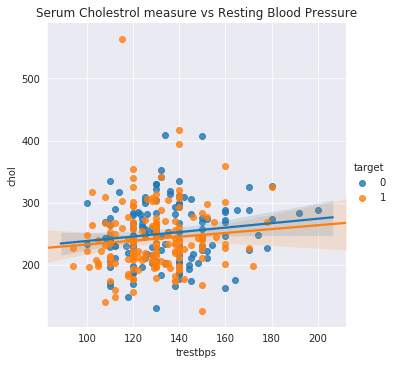

In [14]:
sns.lmplot(x="trestbps", y="chol",data=df,hue='target')
plt.title('Serum Cholestrol measure vs Resting Blood Pressure');

Now to compare the count of different ca value(Number of major vessels (0-3)).

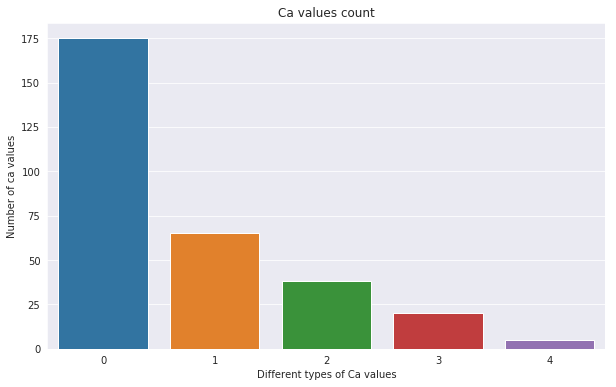

In [15]:
plt.figure(figsize=(10,6))
count= df['ca'].value_counts()
sns.barplot(x=count.index, y=count.values)
plt.ylabel("Number of ca values")
plt.xlabel("Different types of Ca values")
plt.title("Ca values count");

There are maximum records with 0 as the number of major vessels or ca value.

Now lets check the Serum Cholestrol measure vs Maximum heart rate achieved on the basis of presence of disease.

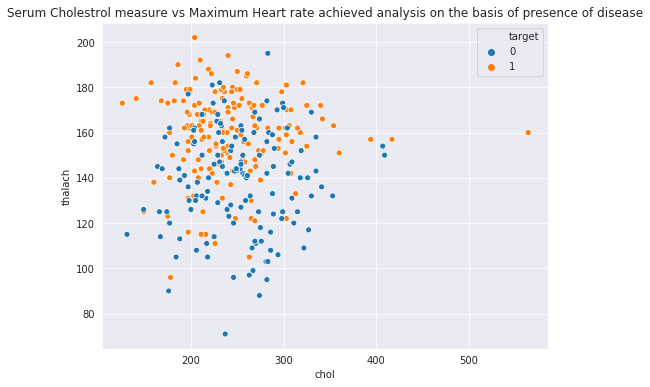

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=df,hue='target')
plt.title('Serum Cholestrol measure vs Maximum Heart rate achieved analysis on the basis of presence of disease');

Now lets see the Maximum Heart Rate achieved at different Age groups.

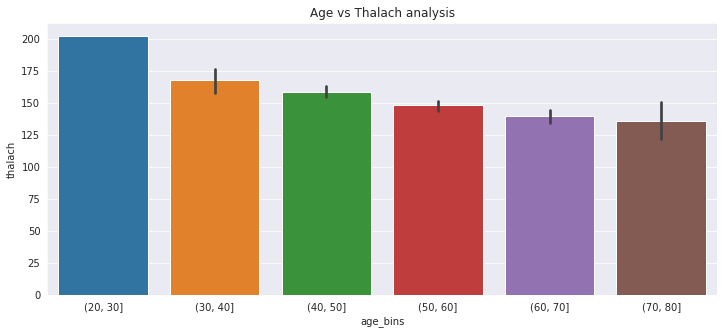

In [17]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['age_bins'],y=df['thalach'],data = df)
plt.title('Age vs Thalach analysis');

Clearly the maximum heart rate achieved is more for the younger people.

Lets check ST depression induced by exercise relative to rest at different ages.

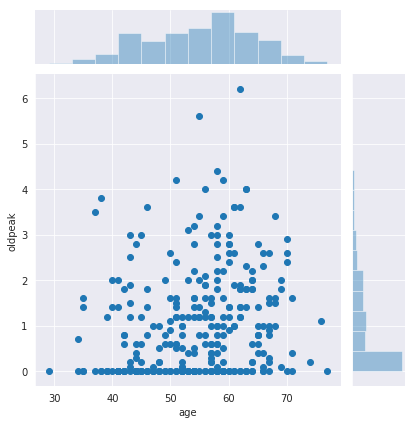

In [18]:
sns.jointplot(x = df['age'], y = df['oldpeak']);

Now to check if there are any null values.

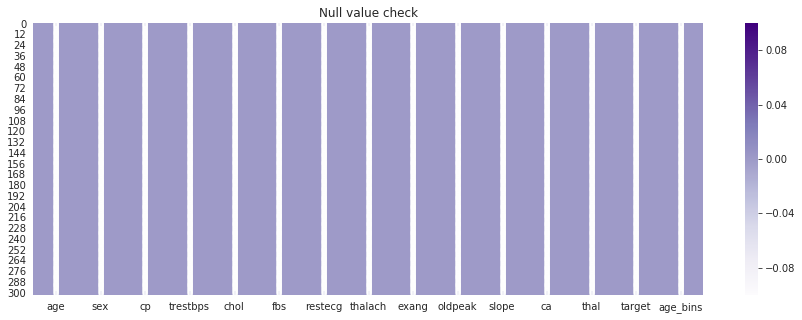

In [19]:
fig,ax=plt.subplots(figsize=(15,5))
sns.heatmap(df.isnull(), annot=True, cmap = 'Purples')
plt.title('Null value check');

Amazing! There are no null values.
So lets prepare our data to create a machine learning model, in our case we will be using Logistic Regression.

In [20]:
#Droping the unnecessary columns and assigning the target column to y.
df.drop('age_bins',axis = 1,inplace = True)
y = df['target']

In [21]:
#Changing the data to categorical.
df['sex']=df['sex'].astype('category')
df['cp']=df['cp'].astype('category')
df['fbs']=df['fbs'].astype('category')
df['restecg']=df['restecg'].astype('category')
df['exang']=df['exang'].astype('category')
df['slope']=df['slope'].astype('category')
df['ca']=df['ca'].astype('category')
df['thal']=df['thal'].astype('category')
df['target']=df['target'].astype('category')

In [22]:
#Getting dummies for our data for our model.
df=pd.get_dummies(df,drop_first=True)
df.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1,37,130,250,187,3.5,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
4,57,120,354,163,0.6,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1


In [23]:
#Assigning the value of X.
X=df.drop('target_1',axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 22 columns):
age          303 non-null int64
trestbps     303 non-null int64
chol         303 non-null int64
thalach      303 non-null int64
oldpeak      303 non-null float64
sex_1        303 non-null uint8
cp_1         303 non-null uint8
cp_2         303 non-null uint8
cp_3         303 non-null uint8
fbs_1        303 non-null uint8
restecg_1    303 non-null uint8
restecg_2    303 non-null uint8
exang_1      303 non-null uint8
slope_1      303 non-null uint8
slope_2      303 non-null uint8
ca_1         303 non-null uint8
ca_2         303 non-null uint8
ca_3         303 non-null uint8
ca_4         303 non-null uint8
thal_1       303 non-null uint8
thal_2       303 non-null uint8
thal_3       303 non-null uint8
dtypes: float64(1), int64(4), uint8(17)
memory usage: 16.9 KB


Now that we have got the data lets prepare our model!

Lets start by spilitting the data into training data and test data.

In [24]:
#We are setting the test data to 25% of the total data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.16, random_state=65)

In [25]:
#Making an instance of Logistic Regression.
from sklearn.linear_model import LogisticRegression
logmod = LogisticRegression()

In [26]:
#Fitting the training data to train our model.
logmod.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
#Now lets predict off our test data!
predictions = logmod.predict(X_test)

Lets check our predictions.

In [28]:
predictions

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0])

Now finally lets see how our model has performed!

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

log_pred=logmod.predict(X_test)
print('Confusion Matrix: ')
print(confusion_matrix(y_test,log_pred))
print('\n')
print('Classification report: ')
print(classification_report(y_test,log_pred))
print('\n')
print('Accuracy score: {}%'.format(round(accuracy_score(y_test,log_pred)*100,2)))

Confusion Matrix: 
[[22  1]
 [ 1 25]]


Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.96      0.96      0.96        26

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49



Accuracy score: 95.92%


Looks like our model did pretty well!